# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [67]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                          "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Visualize first 5 rows of dataframe
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [61]:
# Numerical description of dataframe
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


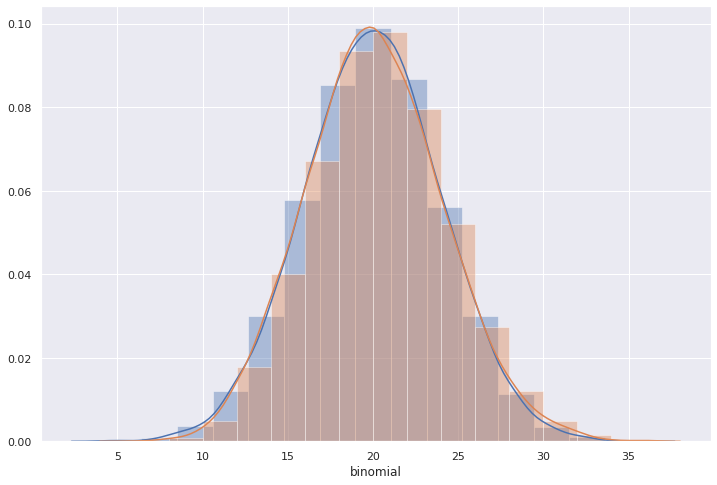

In [65]:
sns.distplot(dataframe['normal'], bins=15)
sns.distplot(dataframe['binomial'], bins=15)

plt.show()

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [17]:
def q1():
    """Answer of question 01
    
    Returns
    -------
    tuple
        Difference between each quartile of the normal and binomial distribution
        on the format (q1_norm - q1_binom, q2_norm - q2_binom, q3_norm - q3_binom)
    """
    
    norm_quartiles = np.percentile(dataframe['normal'], [25, 50, 75])
    binom_quartiles = np.percentile(dataframe['binomial'], [25, 50, 75])
    
    return tuple((norm_quartiles - binom_quartiles).round(3))

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [23]:
def q2():
    """Answer of question 02
    
    Returns
    -------
    float
        Probability of a given value is between one standard deviation
        from the mean
    """
    
    mean = dataframe['normal'].mean()
    std = dataframe['normal'].std()
    
    ecdf = ECDF(dataframe['normal'])
    prob_inf = ecdf(mean - std)
    prob_sup = ecdf(mean + std)
    
    return float(prob_sup - prob_inf)

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [69]:
# For 2 standart deviations from mean value
mean = dataframe['normal'].mean()
std = dataframe['normal'].std()

ecdf = ECDF(dataframe['normal'])
prob_inf = ecdf(mean - 2 * std)
prob_sup = ecdf(mean + 2 * std)
print(float(prob_sup - prob_inf))

0.9538


In [70]:
# For 3 standart deviations from mean value
mean = dataframe['normal'].mean()
std = dataframe['normal'].std()

ecdf = ECDF(dataframe['normal'])
prob_inf = ecdf(mean - 3 * std)
prob_sup = ecdf(mean + 3 * std)
print(float(prob_sup - prob_inf))

0.9973000000000001


As expected, the real value obtained from the normal distribution created is pretty similar to the theorical one (0.68, 0.95, 0.997)

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [36]:
def q3():
    """Answer of question 03
    
    Returns
    -------
    tuple
        Difference between binomial and normal mean and variance on
        the format (mean difference, variance difference)
    """
    
    m_norm = dataframe['normal'].mean()
    v_norm = dataframe['normal'].var()
    m_binom = dataframe['binomial'].mean()
    v_binom = dataframe['binomial'].var()
    delta_m = (m_binom - m_norm).round(3)
    delta_v = (v_binom - v_norm).round(3)
    
    return (delta_m, delta_v)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [39]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [41]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,False
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [56]:
def q4():
    """Answer of question 04
    
    Returns
    -------
    tuple
        Probability associated to 0.80, 0.90 and 0.95 quantiles of standardized
        values of mean_profile of false pulsar stars
    """
    
    false_pulsar = stars[stars['target'] == False]['mean_profile']
    false_pulsar_mean_profile_standardized = (false_pulsar - false_pulsar.mean()) / false_pulsar.std()
    
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    theorical_quantiles = sct.norm.ppf([.80, .90, .95], loc=0, scale=1)
    prob_quantiles = ecdf(theorical_quantiles).round(3)
    
    return tuple(prob_quantiles)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [59]:
def q5():
    """Answer of question 05
    
    Returns
    -------
    tuple
        Difference between real quartiles, obtained from standardization of false pulsar stars,
        and theorical quartiles
    """
    
    false_pulsar = stars[stars['target'] == False]['mean_profile']
    false_pulsar_mean_profile_standardized = (false_pulsar - false_pulsar.mean()) / false_pulsar.std()
    
    real_quartiles = false_pulsar_mean_profile_standardized.quantile([.25, .50, .75])
    theorical_quartiles = sct.norm.ppf([.25, .50, .75], loc=0, scale=1)
    
    return tuple((real_quartiles - theorical_quartiles).round(3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.